In [67]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from src.clean_data import clean_data

In [68]:
df=pd.read_json('data/data.json')

In [4]:
df_clean=clean_data(df)

In [5]:
df_clean.head()

,fraud,delivery_method,fb_published,ticket_type_length,gross_profits_dummie,channels,user_type,sale_duration2
0,True,0.0,0,False,0,5,1,33
1,False,1.0,0,False,3,0,3,28
2,False,1.0,0,False,4,8,3,54
3,False,1.0,0,False,3,6,3,0
4,False,0.0,1,False,4,11,3,63


In [6]:
df_clean.to_csv('data/clean_data.csv')

In [8]:
!pip install xgboost

     |████████████████████████████████| 1.1MB 2.6MB/s eta 0:00:01


In [10]:
!brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
asuka                      fplll                      openstackclient
cddlib                     gau                        pfetch
cdo                        ghz                        qrcp
clip                       ghz-web                    rbtools
code-server                gocloc                     reorder-python-imports
cqlkit                     graphql-cli                rtorrent
cucumber-ruby              hdf5-mpi                   semgrep
dgraph                     kde-extra-cmake-modules    sollya
dmagnetic                  lanraragi                  spotify-tui
duckdb                     lc0                        spotifyd
erlang@22                  leakcanary-shark           trailscraper
eva                        libolm                     unum
field3d                    libpqxx@6                  wasm-pack
flamegraph                 libtorrent-rakshasa        xxh
flarectl    

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [15]:
y=df_clean['fraud']
X=df_clean.drop('fraud',axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

'''
Documentation for xgboost:

https://xgboost.readthedocs.io/en/latest/
'''
model = XGBClassifier()

# fit the model with the training data
model.fit(X_train,y_train)

y_predict_test = model.predict(X_test)
#print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_predict_test)
print('XGboost classifier results:')
print('\naccuracy_score : ', accuracy_test)

print(f'precision: {precision_score(y_test,y_predict_test)}')
print(f'recall: {recall_score(y_test,y_predict_test)}')

XGboost classifier results:

accuracy_score :  0.9701534170153417
precision: 0.8778877887788779
recall: 0.7916666666666666


In [64]:
probabilities = model.predict_proba(X_test)[:,1]

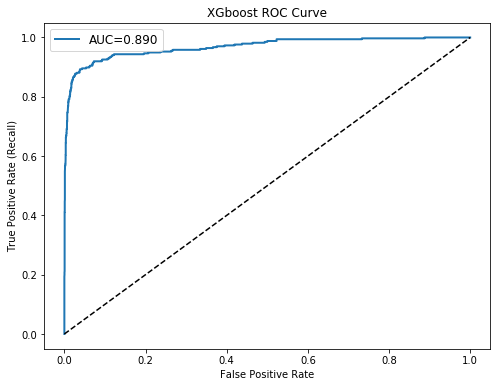

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(ax, fpr, tpr, auc, label=None):
    ax.plot(fpr, tpr, linewidth=2, label=label)
    ax.plot([0,1], [0,1], 'k--')
    ax.set_title(f'{label} ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate (Recall)')
    ax.legend(["AUC=%.3f"%auc], fontsize=12)



fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities)
fig, ax = plt.subplots(figsize=(8,6))
auc_score = metrics.roc_auc_score(y_test, y_predict_test)
plot_roc_curve(ax, fpr, tpr, auc_score,'XGboost')

In [69]:
import pickle
pickle.dump(model, open('models/XG_boost_model.p', 'wb'))

In [54]:
# k-fold cross validation evaluation of XGboost model

import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
recall = cross_val_score(model, X, y, cv=5, scoring='recall')
print('Recall', 100*np.mean(recall))

precision = cross_val_score(model, X, y, cv=5, scoring='precision')
print('Precision', 100*np.mean(precision))


Accuracy: 96.92% (0.37%)
Recall 78.72946035736733
Precision 83.90489474517253
